### Accuracy

$$\text{Accuracy} = \frac{\text{Number of correctly classified points}}{\text{Total numner of points in} \ D_{Test}}$$

The accuracy value ranges between 0 and 1
* 0 → very least performance
* 1 → high performance

**Pros**

* Easy to understand the measure

**Cons**

* In the case of imbalanced data, the accuracy can be biased depending upon the `target_feature` which is large.
* If we try to get the probability scores of two models,
    - 1st model can give meaningful probabilities whereas 2nd model is opposite to 1st, but when measured the accuracy of these two models - it can be same. Down the line, we know which model is better.
    - Accuracy has no access to proabability scores.

### Confusion Matrix

* A `confusion matrix` is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. 

* The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

* Principal diagonal elements of the matrix should always be high. This is an indication that the model is performing better.

<img src="https://miro.medium.com/max/566/1*q2ozl-R0bxWXMwWmkERdsQ.png">

<img src="https://i.imgur.com/iGLkDOL.png">

**Credits** - Image from Internet

From the above image we can get -

* $\text{n} = \text{N} + \text{P}$
* $\text{TPR} = \frac{\text{TP}}{\text{P}}$
* $\text{TNR} = \frac{\text{TN}}{\text{N}}$
* $\text{FPR} = \frac{\text{FP}}{\text{N}}$
* $\text{FNR} = \frac{\text{FN}}{\text{P}}$

### Precision v/s Recall v/s F1-Score

> Precision and Recall are often in information retrieval problems.

* **Precision** → of all the points the model declared/predicted to be positve, but what is the percentage of them that are positive.

$$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$

* **Recall** → similar to TPR. Of all the actually positive points, how many of are predicted to be positive.

$$\text{Recall} = \frac{\text{TP}}{\text{P}} = \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

> Precision and Recall mostly care about positive class.

* **F1-Score** → is a one measure that combines both precision and recall (similar to harmonic mean formula).

$$\text{F1-Score} = 2 \bigg[\frac{\text{Precision} * \text{Recall}}{\text{Precision} + \text{Recall}} \bigg]$$

### Receiver Operating Characteristic Curve (ROC) and Area Under this Curve (AUC)

* Take each probability score and consider it as a threshold and create a binary column.
* We need to repeat this for all the predictions (scores).
    - Whichever probability score is greater (close to 1) simply means that it is positive.
* Compute `TPR` and `FPR` with respect to actual values and predictions based on threshold.
* If we plot `TPR` and `FPR`, we get ROC curve. The area under this curve is AUC which is lies between 0 and 1.

**Properties of AUC**

* AUC will be high for imbalanced data.
* AUC only cares about scores which are sorted in decreasing order.
* AUC for any random binary classification model will be exactly 0.5.

tpr = [0.  0.5 0.5 1.  1. ]
fpr = [0.  0.  0.5 0.5 1. ]
thresholds =  [1.8  0.8  0.4  0.35 0.1 ]


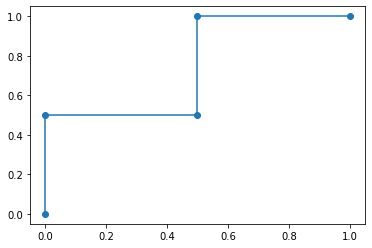

In [1]:
import numpy as np
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

y = np.array([0, 0, 1, 1])
# remember you need to have scores as probabilities
# scores = model.predict_proba(y)
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = roc_curve(y, scores)

print("tpr =",tpr)
print("fpr =", fpr)
print("thresholds = ",thresholds)

plt.plot(fpr, tpr, 'o-')
plt.show()

### Log-Loss

* Log-Loss uses the actual probability scores.

$$\text{log-loss} = \frac{-1}{n} \sum_{i = 1}^n \big\{\log(p_i)*y_i + (1-y_i)*\log(1-p_i) \big\}$$

* We want log-loss to be as small as possible.
* It can lie between $0$ to $\infty$.
* Log-Loss is the most important classification metric based on probabilities.

### R-squared / Coefficient of Determination

1. In regression, error is mathematically written as -

$$e_i = y_i - \hat{y_i}$$

where

* $y_i$ is an actual value
* $\hat{y_i}$ is the predicted value

---

2.  Total sum of squares 

$$\implies \text{SS}_{\text{Total}} = \frac{1}{n} \sum_{i = 1}^n (y_i - \bar{y})^2$$

where

* $y_i$ is an actual value
* $\bar{y}$ is the mean of all $y_i$'s

---

3. Sum of squares of residuals

$$\implies \text{SS}_{\text{Res}} = \sum_{i = 1}^n (y_i - \hat{y_i})^2 = \sum_{i = 1}^n e_i^2$$

where

* $y_i$ is an actual value
* $\hat{y_i}$ is the predicted value

---

4. Coefficient of determination or $\text{R}^2$

$$\text{R}^2 = \bigg[1 - \frac{\text{SS}_{\text{Res}}}{\text{SS}_{\text{Total}}}\bigg]$$

* **Case - 1**
    - $e_i = 0 \implies \text{SS}_{\text{Res}} = 0 \implies \text{R}^2 = 1 \implies \text{best value}$
* **Case - 2**
    - $\text{SS}_{\text{Res}} < \text{SS}_{\text{Total}} \implies \text{R}^2 = (0 \ \text{to} \ 1) \implies \text{often observed}$
    - Closer the $\text{R}^2$ is to $1$, the better it is
    - Closer the $\text{R}^2$ is to $0$, the worst it is
* **Case - 3**
    - $\text{SS}_{\text{Res}} = \text{SS}_{\text{Total}} \implies \text{R}^2 = 0 \implies \text{model is same as Simple Mean Model}$
* **Case - 4**
    - $\text{SS}_{\text{Res}} > \text{SS}_{\text{Total}} \implies \text{R}^2 < 0 \implies \text{model is worse than Simple Mean Model}$

---

**Limitations**

* $\text{R}^2$ is not very robust to outliers.

### Median Absolute Deviation (MAD)

* There can be scenarious in which the any random element of error list can be very large and that can mess the metric ($\text{R}^2$).
* To avoid this, we compute `MAD` of all errors since median is very robust to outliers.
* First, compute the median of errors and then check `MAD`. If `MAD` is close to median of errors then model is good else it is bad.

$$\text{MAD} = \text{Med}\big(\big|e_i - \text{Med}(E)\big|\big)$$

where

* $E = [e_1, e_2, e_3, \dots, e_n]$

### Distribution of Errors

* We can also plot the `PDF` and `CDF` curves for the error list and determine the model performance.

### When to use which performance metrics?

* **Log-Loss** → If we want probabilities of classes.

* **Accuracy** → If classes are balanced.

* **Precision** → If classes are imbalanced and we are more concerned about only `True positive`.

* **Recall** → If we are more concerned about `False negative` and `True positive`.

* **F1 score** → It is a balance between precision and recall.

* **ROC_AUC** → If our concern is both classes (`True negative` and `True positive`).